In [24]:
import duckdb
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


DB = "sampled-data/crossref.duckdb"
conn = duckdb.connect(DB)
conn.sql("show tables")

┌─────────┐
│  name   │
│ varchar │
├─────────┤
│ works   │
└─────────┘

In [9]:
conn.table("works").df()

,doi,deposited,created,deposit_delay_days,has_refs,citations_incoming,citations_outgoing,member,work_type
0,10.1002/ece3.70502,2025-02-18,2024-11-09,100,True,1,38,311,journal-article
1,10.3389/fpsyt.2021.752539,2024-09-19,2022-02-21,940,True,10,129,1965,journal-article
2,10.1007/s13233-017-5017-9,2024-06-21,2017-01-04,2725,True,71,25,297,journal-article
3,10.1038/sj.onc.1203248,2022-03-21,2002-09-04,7138,True,26,51,297,journal-article
4,10.1109/tie.2022.3208600,2023-04-24,2022-09-28,207,True,27,35,263,journal-article
...,...,...,...,...,...,...,...,...,...
1978113,10.14321/jj.9127993.8,2024-02-01,2024-02-01,0,False,0,0,5556,book-chapter
1978114,10.2307/j.ctv333ks1w.210,2023-04-29,2023-04-29,0,False,0,0,1121,book-chapter
1978115,10.1021/ja01031a068,2023-03-31,2005-03-10,6594,False,30,0,316,journal-article
1978116,10.17648/aco-2238-9377-9-3-6,2021-02-25,2021-02-25,0,False,0,0,7016,journal-article


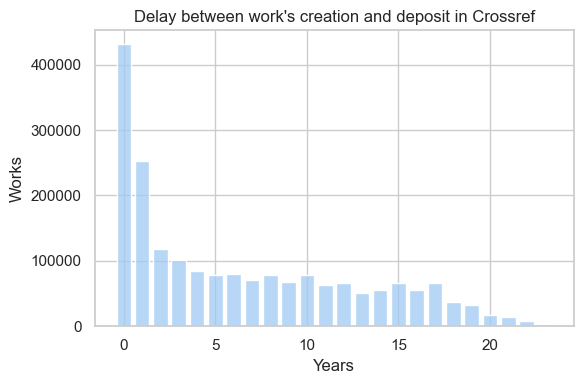

In [44]:
fig, ax = plt.subplots(figsize = (6 , 4))

sns.set_theme(style="whitegrid", palette=None)

g = sns.histplot(
    ax=ax,
    data=conn.table("works").select('ceil(deposit_delay_days/365) as delay').df(), 
    x="delay",
    discrete=True,
    shrink=.8,
)

ax.set_xlabel("Years")
ax.set_ylabel("Works")
plt.title("Delay between work's creation and deposit in Crossref")

plt.tight_layout()

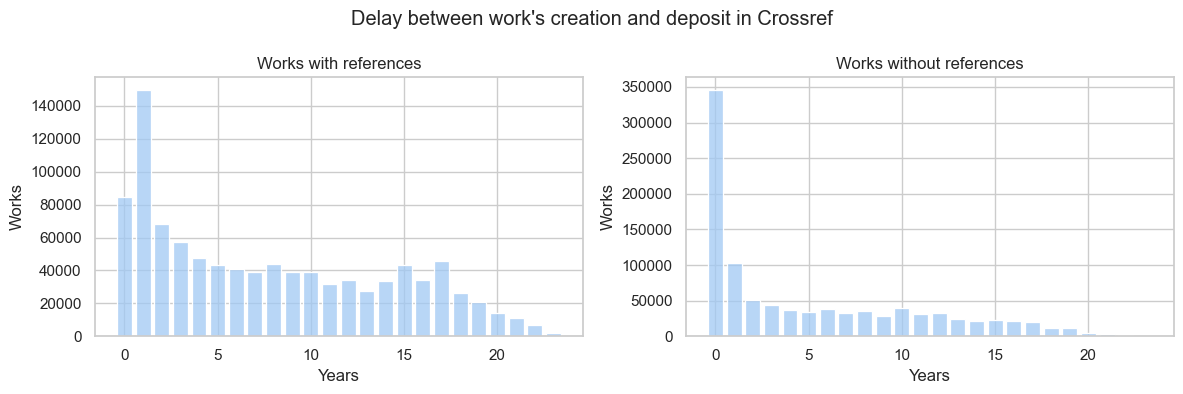

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 4))

sns.set_theme(style="whitegrid", palette=None)

sns.histplot(
    ax=ax1,
    data=conn.table("works").filter("has_refs = True").select('ceil(deposit_delay_days/365) as delay').df(), 
    x="delay",
    discrete=True,
    shrink=.8,
).set_title("Works with references")

sns.histplot(
    ax=ax2,
    data=conn.table("works").filter("has_refs = False").select('ceil(deposit_delay_days/365) as delay').df(), 
    x="delay",
    discrete=True,
    shrink=.8,
).set_title("Works without references")

ax1.set_xlabel("Years")
ax1.set_ylabel("Works")
ax2.set_xlabel("Years")
ax2.set_ylabel("Works")
fig.suptitle("Delay between work's creation and deposit in Crossref")

plt.tight_layout()